In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
import boost_histogram as bh
from tqdm import tqdm

In [2]:
from impy.constants import GeV
from impy.kinematics import EventKinematics
from impy import impy_config
from impy.models import DpmjetIII191

In [3]:
impy_config["user_frame"] = 'center-of-mass'
impy_config['tau_stable'] = 10e-12
impy_config['pi0_stable'] = True
impy_config['debug_level'] = 2

In [4]:
event_kinematics = EventKinematics(
    ecm= 14000 * GeV,
    p1pdg=2212,
    p2pdg=2212
)

generator = DpmjetIII191(event_kinematics)

impy.models.dpmjetIII.DpmjetIII191::init_generator(): Initializing DPMJET-III
 +-----------------------------------------------------------------------+
 |                                                                       |
 |                       DPMJET-III version 19.1.2                       |
 |                                                                       |
 |                      (Last change:  15 Mar 2021)                      |
 |                                                                       |
 |            Authors:                                                   |
 |                     Stefan Roesler     (CERN)                         |
 |                     Anatoli Fedynitch  (ICRR)                         |
 |                     Ralph Engel        (KIT)                          |
 |                     Johannes Ranft     (Siegen Univ.)                 |
 |                                                                       |
 |        https://gith

In [5]:
h = bh.Histogram(bh.axis.IntCategory([-211, 211], metadata=["-", "+"]),
                 bh.axis.Regular(30, -10, 10))

n_events = 50000

for event in tqdm(generator(n_events), total=n_events):
    ev = event.final_state_charged()
    h.fill(ev.pid, ev.eta)


  0%|          | 107/50000 [00:00<00:47, 1050.48it/s]

 DT_INITJS: JETSET-parameter for PHOJET
 DT_JSPARA: new value (default value)
            PARJ(  1):  0.080 ( 0.100)
            PARJ(  2):  0.160 ( 0.300)
            PARJ(  3):  0.900 ( 0.400)
            MSTU(  4):   4000 ( 12000)
            PARJ(  5):  0.200 ( 0.500)
            PARJ(  7):  0.850 ( 0.500)
            MSTJ( 12):      3 (     2)
            PARJ( 18):  0.100 ( 1.000)
            MSTU( 20):      1 (     0)
            MSTJ( 21):      1 (     2)
            PARJ( 21):  0.420 ( 0.360)
            MSTU( 22):  50000 (    10)
            MSTJ( 22):      2 (     1)
            PARJ( 42):  0.850 ( 0.580)
            PARJ( 71):  2.998 (10.000)
            PARU(108):  0.008 ( 0.000)
1                                                                              
 ******************************************************************************
 ******************************************************************************
 **                                                       

100%|██████████| 50000/50000 [00:36<00:00, 1377.60it/s]


Text(0.5, 0, '$\\eta$')

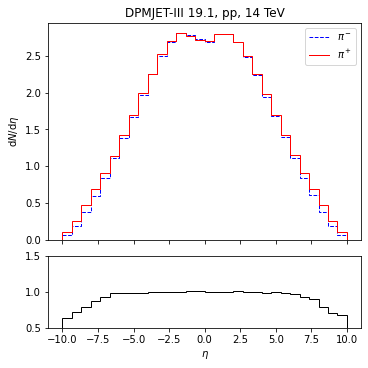

In [6]:
fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},
                         sharex=True, figsize=(5, 5), constrained_layout=True)
axes[0].set_title(f'{generator.label}, pp, 14 TeV')
for values, charge in zip(h.values(), h.axes[0].metadata):
    axes[0].stairs(values / h.axes[1].widths / n_events, h.axes[1].edges,
                   color={"+": "r", "-": "b"}[charge],
                   ls={"+": "-", "-": "--"}[charge],
                   label=f'$\\pi^{charge}$')
axes[0].set_ylabel(r'd$N$/d$\eta$')
axes[0].legend()
axes[1].stairs(h.values()[0]/h.values()[1], h.axes[1].edges, color='k')
axes[1].set_ylim(.5,1.5)
axes[1].set_xlabel(r'$\eta$')

# plt.savefig('pp_14_TeV_pions.png', dpi=200)
# plt.ylim(1e-2,)
# plt.semilogy()
